# Sports Complex

In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Visitor:
    def __init__(self, id, surname, balance):
        self.id = id
        self.surname = surname
        self.balance = balance

    @property
    def id(self):
        return self.__id

    @id.setter
    def id(self, value):
        self.__id = value

    @property
    def surname(self):
        return self.__surname

    @surname.setter
    def surname(self, value):
        self.__surname = value

    @property
    def balance(self):
        return self.__balance

    @balance.setter
    def balance(self, value):
        self.__balance = value

In [3]:
class TrainingType:
    def __init__(self, id, title, price):
        self.id = id
        self.title = title
        self.price = price

    @property
    def id(self):
        return self.__id

    @id.setter
    def id(self, value):
        self.__id = value

    @property
    def title(self):
        return self.__title

    @title.setter
    def title(self, value):
        self.__title = value

    @property
    def price(self):
        return self.__price

    @price.setter
    def price(self, value):
        self.__price = value

In [4]:
class TrainingDetails:
    def __init__(self, visitor_id, training_type_id, date):
        self.visitor_id = visitor_id
        self.training_type_id = training_type_id
        self.date = date

    @property
    def visitor_id(self):
        return self.__visitor_id

    @visitor_id.setter
    def visitor_id(self, value):
        self.__visitor_id = value

    @property
    def training_type_id(self):
        return self.__training_type_id

    @training_type_id.setter
    def training_type_id(self, value):
        self.__training_type_id = value

    @property
    def date(self):
        return self.__date

    @date.setter
    def date(self, value):
        self.__date = datetime.strptime(value, '%d/%m/%Y')

    @property
    def date_string(self):
        return self.date.strftime('%d/%m/%Y')

In [5]:
visitors = pd.read_csv('files/sports_complex/visitors.csv')
training_types = pd.read_csv('files/sports_complex/training_types.csv')
training_details = pd.read_csv('files/sports_complex/training_details.csv')

## Task 1

In [6]:
count_for_each_training_type = []
for training_type in training_types.itertuples():
    count = 0
    for training_detail in training_details.itertuples():
        if training_type.id == training_detail.training_type_id:
            count += 1

    count_for_each_training_type.append({
        'training_type_id': training_type.id,
        'training_type_title': training_type.title,
        'count': count
    })

df = pd.DataFrame(count_for_each_training_type).set_index('training_type_id')
df

,training_type_title,count
training_type_id,,
1,Training 1,11
2,Training 2,2
3,Training 3,1
4,Training 4,2
5,Training 5,1


## Task 2

<Axes: title={'center': 'Number of trainings for each training type'}, xlabel='training_type_title'>

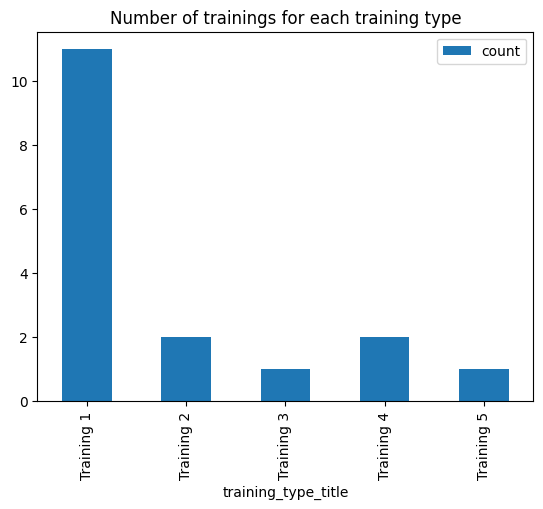

In [7]:
df.plot(
    kind='bar',
    x='training_type_title',
    y='count',
    title='Number of trainings for each training type'
)

## Task 3

In [8]:
def get_visitor_by_id(id, visitors):
    try:
        return list(filter(
            lambda visitor: visitor.id == id,
            visitors
        ))[0]
    except IndexError:
        return None


def get_training_type_by_id(id, training_types):
    try:
        return list(filter(
            lambda training_type: training_type.id == id,
            training_types
        ))[0]
    except IndexError:
        return None

In [9]:
def get_invoices(surname=None, start_date=None, end_date=None):
    training_instances = []
    visitor_instances = []
    training_type_instances = []

    for training in training_details.itertuples():
        training_instances.append(
            TrainingDetails(
                training.visitor_id,
                training.training_type_id,
                training.date
            )
        )

    for visitor in visitors.itertuples():
        visitor_instances.append(
            Visitor(
                visitor.id,
                visitor.surname,
                visitor.balance
            )
        )

    for training_type in training_types.itertuples():
        training_type_instances.append(
            TrainingType(
                training_type.id,
                training_type.title,
                training_type.price
            )
        )

    if start_date is not None and end_date is not None:
        start_date = datetime.strptime(start_date, '%d/%m/%Y')
        end_date = datetime.strptime(end_date, '%d/%m/%Y')

        trainings_in_range = list(filter(
            lambda training: start_date <= training.date <= end_date,
            training_instances
        ))
    else:
        trainings_in_range = training_instances

    if surname is not None:
        trainings_in_range = list(filter(
            lambda training: get_visitor_by_id(training.visitor_id, visitor_instances).surname == surname,
            training_instances
        ))

    invoices = []

    for training in trainings_in_range:
        visitor = get_visitor_by_id(training.visitor_id, visitor_instances)
        training_type = get_training_type_by_id(training.training_type_id, training_type_instances)

        if visitor is not None:
            has_discount = False
            if len(list(filter(
                    lambda _training: _training.date == training.date and _training.visitor_id == training.visitor_id,
                    trainings_in_range
            ))) > 1:
                has_discount = True

            visitor.balance -= training_type.price * (0.6 if has_discount else 1)

            invoices.append({
                'visitor_id': visitor.id,
                'visitor_surname': visitor.surname,
                'training_type_title': training_type.title,
                'training_type_price': training_type.price,
                'training_date': training.date_string,
                'has_discount': has_discount,
                'discount': training_type.price * (0.4 if has_discount else 0),
                'total': training_type.price * (0.6 if has_discount else 1),
                'balance': visitor.balance
            })

    return pd.DataFrame(invoices).sort_values(by=['visitor_id']).set_index('visitor_id')


invoices_by_date_range = get_invoices(start_date='01/01/2023', end_date='31/12/2023')
invoices_by_date_range

,visitor_surname,training_type_title,training_type_price,training_date,has_discount,discount,total,balance
visitor_id,,,,,,,,
1,Smith,Training 1,100,01/01/2023,True,40.0,60.0,40.0
1,Smith,Training 1,100,01/01/2023,True,40.0,60.0,-20.0
1,Smith,Training 1,100,01/01/2023,True,40.0,60.0,-80.0
2,Johnson,Training 1,100,01/01/2023,True,40.0,60.0,140.0
2,Johnson,Training 1,100,01/01/2023,True,40.0,60.0,80.0
2,Johnson,Training 2,200,01/01/2023,True,80.0,120.0,-40.0
3,Williams,Training 1,100,01/01/2023,True,40.0,60.0,240.0
3,Williams,Training 1,100,01/01/2023,True,40.0,60.0,180.0
4,Jones,Training 1,100,01/01/2023,False,0.0,100.0,300.0


## Task 4

<Axes: title={'center': 'Total amount of money for each visitor'}>

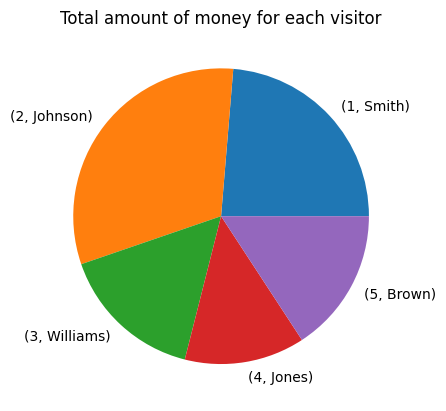

In [10]:
invoices_by_date_range.groupby(['visitor_id', 'visitor_surname']).sum().plot(
    kind='pie',
    y='total',
    title='Total amount of money for each visitor',
    legend=False,
    ylabel=''
)

## Task 5

In [11]:
invoices_by_surname = get_invoices(surname='Johnson')[['training_type_title', 'total']]
invoices_by_surname

,training_type_title,total
visitor_id,,
2,Training 1,100.0
2,Training 4,400.0
2,Training 1,60.0
2,Training 1,60.0
2,Training 2,120.0


## Task 6

<Axes: title={'center': 'Total amount of money for each training type for visitor with surname Johnson'}>

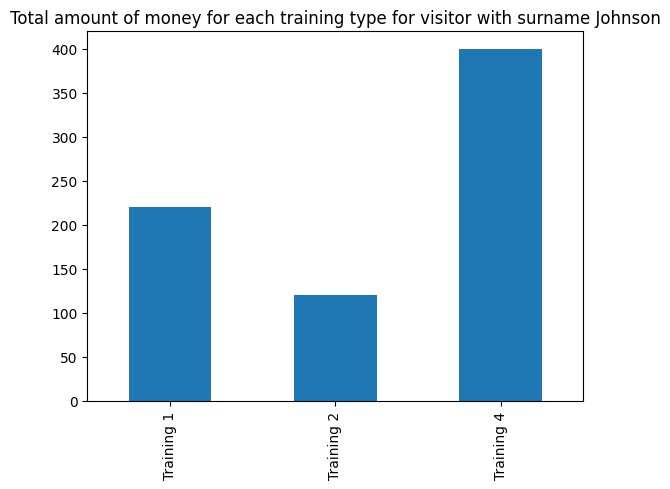

In [12]:
invoices_by_surname.groupby(['training_type_title']).sum().plot(
    kind='bar',
    y='total',
    title='Total amount of money for each training type for visitor with surname Johnson',
    legend=False,
    xlabel='',
    ylabel=''
)